<a href="https://colab.research.google.com/github/saishree2004/Machine-learning/blob/main/ML6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age': [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # 1 = Male, 0 = Female
}
df = pd.DataFrame(data)
print(df)

   Height  Weight  Age  Gender
0     170      65   30       1
1     165      59   25       0
2     180      75   35       1
3     175      68   28       1
4     160      55   22       0
5     172      70   32       1
6     168      62   27       0
7     177      74   33       1
8     162      58   24       0
9     158      54   21       0


In [5]:
X = df.drop('Gender', axis=1)
y = df['Gender']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

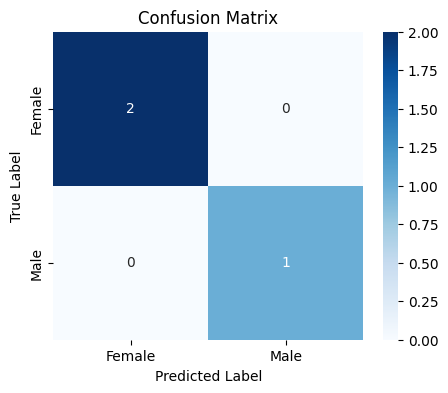

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

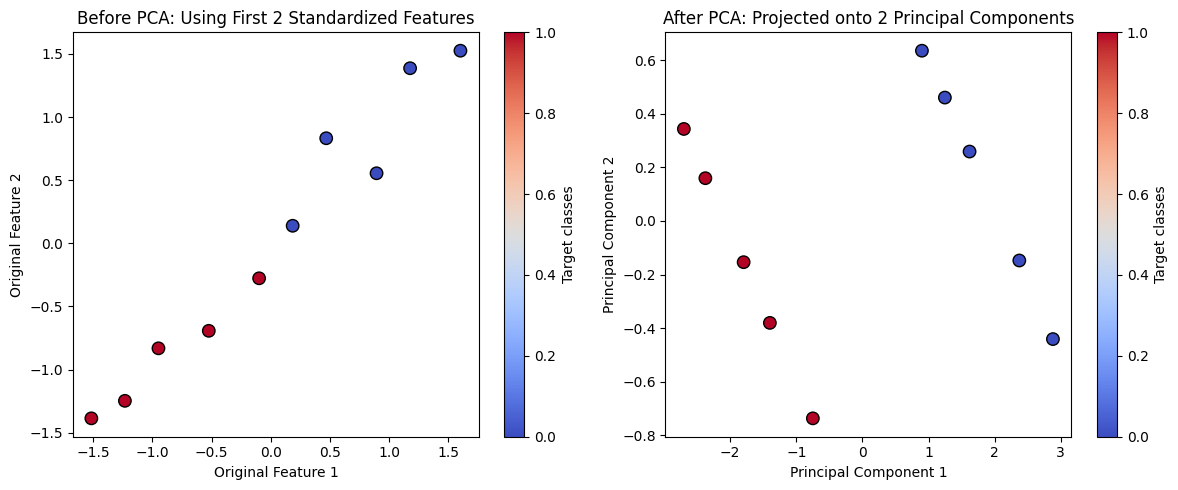

In [8]:
y_numeric = pd.factorize(y)[0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target classes')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()

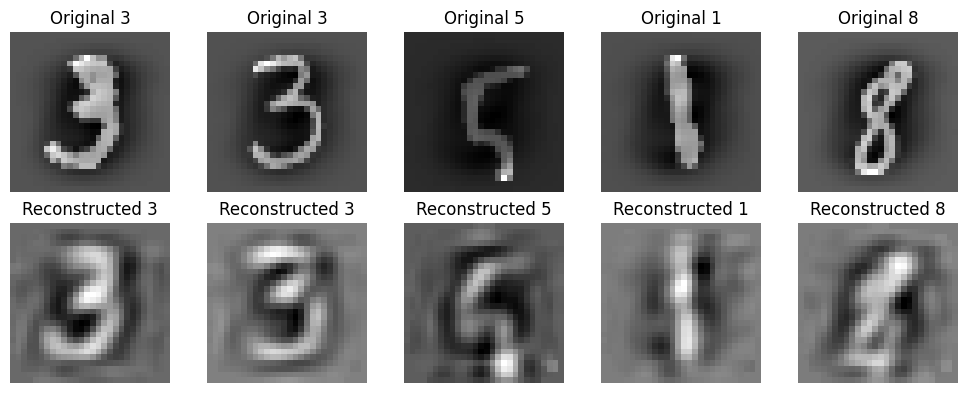

Explained variance ratio: [0.05642719 0.04041226 0.03738273 0.02893    0.02520752 0.02192549
 0.01914282 0.01740684 0.01532232 0.01396087]
Total explained variance (for 50 components): 0.5494590903755294


In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset (MNIST in this case)
# You can replace this with any other dataset or custom dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # The image data (28x28 flattened to 784)
y = mnist.target.astype(int)  # Labels (digits from 0-9)

# Step 2: Preprocess the data
# We don't need to scale the data for PCA since PCA is scale-invariant
# But to ensure consistency, we can standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
# Let's say we want to reduce to 50 principal components
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Reconstruct the images from the PCA components
X_reconstructed = pca.inverse_transform(X_pca)

# Step 5: Plot a few original vs reconstructed images to visualize the result
def plot_images(original, reconstructed, idxs):
    fig, axes = plt.subplots(2, len(idxs), figsize=(10, 4))

    for i, idx in enumerate(idxs):
        # Original Image
        axes[0, i].imshow(original[idx].reshape(28, 28), cmap='gray')
        axes[0, i].set_title(f"Original {y[idx]}")
        axes[0, i].axis('off')

        # Reconstructed Image
        axes[1, i].imshow(reconstructed[idx].reshape(28, 28), cmap='gray')
        axes[1, i].set_title(f"Reconstructed {y[idx]}")
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Choose a few indices to plot the comparison
sample_indices = [10, 50, 100, 200, 300]
plot_images(X_scaled, X_reconstructed, sample_indices)

# Step 6: Explained Variance Ratio
# This gives us the proportion of variance each principal component explains
print(f"Explained variance ratio: {pca.explained_variance_ratio_[:10]}")  # Show top 10 components
print(f"Total explained variance (for 50 components): {np.sum(pca.explained_variance_ratio_)}")

# Step 7: Compare the reconstructed images with the original ones
# Visualize first few components of the original vs PCA reduced
